# Advent of Code 2015
> a verbose solve of AOC 2015

- date: 2020-08-10
- toc: true
- tags: [python]

Quarantime time is the perfect time to setup a jupyter notebook powered blog and solve [Advent of Code](http://adventofcode.com/), starting with 2015. The following is a write up of how to solve and things I learved while doing so, thus some of the code is spelled out and slow! So look at the [AOC reddit site](https://www.reddit.com/r/adventofcode/) for ninja level solutions.

I am trying to

- code in a readable fashion, avoiding shortcuts (easier said then done!)
- make visuals as many problems as possible.
- not [mangle up jupyter notebooks too badly](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit?usp=sharing). Real code is written using a text editor! Unless you are [Netflix](https://netflixtechblog.com/notebook-innovation-591ee3221233), or course, or using [rmarkdown](https://yihui.org/en/2018/09/xfun-pkg-attach/).

First up, I'm importing all the libs I'll use up here:

In [5]:
#collapse-hide
# python essentials
import os
import re
import hashlib
import math
from pathlib import Path
from typing import List
from collections import defaultdict, namedtuple, Counter

# useful external libs
#import numpy as np
import pandas as pd

# misc utils
import requests
#from tqdm.notebook import trange, tqdm # progress bars for slow funcs
#from functools import reduce 

# for plots, cause visuals
import matplotlib.pyplot as plt # goto python viz lib
import seaborn as sns # prettify matplotlib
from IPython.display import display, Markdown

# javascript plotting for interactive graphs
#import altair as alt
#import plotly.express as px

Some helper functions to avoid rewriting the same code for all the problems:

In [7]:
#collapse-hide
input_path = Path.home() / "code" / "adventofcode" / "inputs"
github_url = url = "https://github.com/khalido/adventofcode/raw/master/inputs"

def get_input(day:int=1, year:int=2015) -> str:
    """takes in the day, year and date, returns the input"""
    
    try:    # load from local disk
        with open(input_path / f"{year}" / f"{day}.txt") as f:
            data = f.read()
    except: # else load from github repo
        print(f"Failed to load {year}/{day}.txt from disk, trying to get from github")
        url = f"{github_url}/{year}/{day}.txt"
        r = requests.get(url)
        if r.status_code == 200:
            data = r.text
        else:
            print(f"Failed to load {year}.{day}")
            data = None
            
    return data.strip()

def printmd(txt="## testing"):
    display(Markdown(txt))

## Day 1: Not Quite Lisp

[#](https://adventofcode.com/2015/day/1) We're standing at a inifinite building, and following instructions:`(` is up, `)` is down to find the right floor.

This is simple - minus the ups from the downs:

In [9]:
inp1 = get_input(1)
inp1.count("(") - inp1.count(")")

138

A list comprehension version for kicks:

In [10]:
sum([1 if char == "(" else -1 for char in inp1])

138

for part 2, we need to find the first time he enters the basement while following the instructions.

Timesteps to reach the basement: **1771**

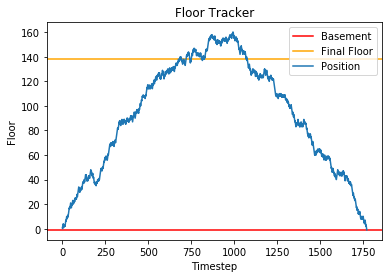

In [123]:
floor = 0
floors = []

for i, mv in enumerate(inp1):
    if mv == "(":
        floor += 1
    else:
        floor -= 1
    
    floors.append(floor)
    
    if floor == -1:
        printmd(f"Timesteps to reach the basement: **{i + 1}**")
        break # no need to continue climbing

plt.title("Floor Tracker"); plt.xlabel("Timestep"); plt.ylabel("Floor")
plt.axhline(y=-1, label="Basement", color="red")
plt.axhline(y=138, label="Final Floor", color="orange")
plt.plot(range(len(floors)), floors, label="Position")
plt.legend(loc="upper right");

## Day 2: I Was Told There Would Be No Math

How much wrapping paper is needed to wrap a bunch of presents?
We need`2*l*w + 2*w*h + 2*h*l` paper, and the input is the l, w and h of each present.

In the bad old days of programming, this would be the perfect place to represent the data as a list or tuple in the form `[3 ,3, 9]` representing `[l, w, h]`. But now we can use namedtuples to make it easier to understand the data:

In [177]:
Present = namedtuple("Present", ["l", "w", "h"])

inp2 = get_input(2).split("\n")
data2 = [Present(*[int(x) for x in i.split("x")]) for i in inp2]
data2[:4]

[Present(l=29, w=13, h=26),
 Present(l=11, w=11, h=14),
 Present(l=27, w=2, h=5),
 Present(l=6, w=10, h=13)]

In [173]:
def get_present_area(p: Present) -> int:
    box_area = sum([2*p.l*p.w, 2*p.w*p.h, 2*p.h*p.l])
    extra_paper = math.prod(sorted(p)[:2])
    return box_area + extra_paper

sum([get_present_area(x) for x in data2])

1586300

Now we need to calcuate the ribbon required, which is equal to the perimeter of the smallest face + cubic volume of the present

In [175]:
def ribbon(present: Present) -> int:
    """takes in present, returns length of ribbon needed to wrap"""
    l, w, h = sorted(present)
    return 2*l + 2*w + l*w*h

sum([ribbon(present) for present in data2])

3737498

## Day 3: Perfectly Spherical Houses in a Vacuum

[#](https://adventofcode.com/2015/day/3) Santa is delivering presents to houses, and his movements is 1 step at a time: north (^), south (v), east (>), or west (<)

Santa visited **2565** unique places.

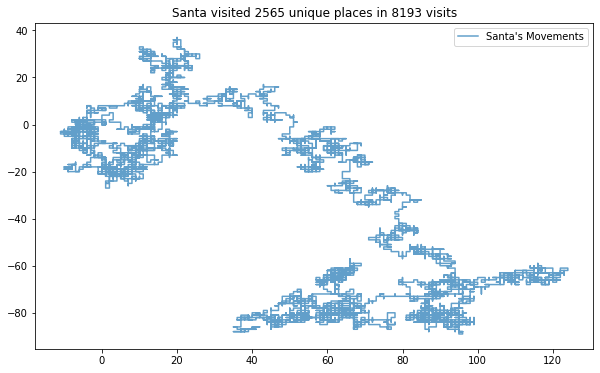

In [222]:
inp3 = get_input(3)

dirs = {"^": (0,1), ">": (1,0), "v": (0,-1), "<": (-1, 0)}

def get_moves(data):
    moves = [(0,0)]  # starting point

    for mv in data:
        x, y = moves[-1] # x,y of current pos
        xx, yy = dirs[mv]
        moves.append((x + xx, y + yy))
    return moves

moves = get_moves(inp3)
c = Counter(moves)
printmd(f"Santa visited **{len(c)}** unique places.")

x, y = zip(*moves)

f, ax = plt.subplots(figsize=(10,6))
plt.title(f"Santa visited {len(c)} unique places in {len(moves)} visits")
ax.plot(x,y, alpha=0.7, label="Santa's Movements"); ax.legend();

for part 2, we have two santas! They move alternatingly, so we can say Santa_1 does all the odd moves and Santa_2 does all the even moves:

The two santas visited **2639** unique places.

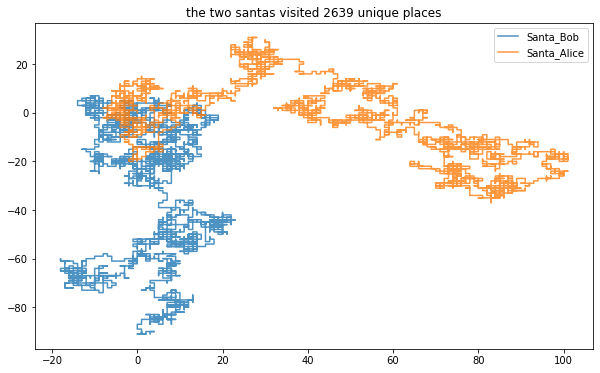

In [230]:
santa_1 = get_moves(inp3[::2])  # all the odd moves
santa_2 = get_moves(inp3[1::2]) # all the even moves

two_santas = Counter(santa_1 + santa_2)
printmd(f"The two santas visited **{len(two_santas)}** unique places.")

f, ax = plt.subplots(figsize=(10,6))
plt.title(f"the two santas visited {len(two_santas)} unique places")

for name, santa in zip(("Bob", "Alice"), (santa_1, santa_2)):
    x, y = zip(*santa)
    ax.plot(x,y, alpha=0.8, label=f"Santa_{name}")
ax.legend();

## Day 4: The Ideal Stocking Stuffer


[#](https://adventofcode.com/2015/day/4)

In [251]:
inp4 = "bgvyzdsv"
test4_1 = "abcdef" #609043
test4_2 = "pqrstuv" # 1048970

def make_hash(txt):
    return hashlib.md5(txt.encode("utf")).hexdigest()



False

In [263]:
def day_4_1(inp=inp4, s="None", target="00000", i=0) -> int:
    while not s.startswith(target):
        i += 1
        txt = inp + str(i)
        s = make_hash(txt)
    printmd(f"_{inp}_ target at position **{i:,}** ({s})")
    return i

assert day_4_1("abcdef") == 609043    # tests are always a good idea
assert day_4_1("pqrstuv") == 1048970    

day_4_1()

_abcdef_ target at position **609,043** (000001dbbfa3a5c83a2d506429c7b00e)

_pqrstuv_ target at position **1,048,970** (000006136ef2ff3b291c85725f17325c)

_bgvyzdsv_ target at position **254,575** (000004b30d481662b9cb0c105f6549b2)

254575

Part two just changes the target sring to have one more zero so thanks to making part one a function this is easy:

In [265]:
day_4_1(target="000000")

_bgvyzdsv_ target at position **1,038,736** (000000b1b64bf5eb55aad89986126953)

1038736

## Day 5: Doesn't He Have Intern-Elves For This?

[#](https://adventofcode.com/2015/day/5) We have a list of strings, and Santa has the following rules to figure out which ones are nice:

- at least three vowels (aeiou only), like aei, xazegov, or aeiouaeiouaeiou.
- at least one letter that appears twice in a row, like xx, abcdde (dd), or aabbccdd (aa, bb, cc, or dd).
- does not contain the strings ab, cd, pq, or xy, even if they are part of one of the other requirements.


In [270]:
vowels = "aeiou"                        # need vowels
bad_strings = ["ab", "cd", "pq", "xy"]  # don't want these
regex = re.compile(r"([a-zA-Z])\1{1,}") # search for 2+ letters in a row

test4 = ["ugknbfddgicrmopn", "aaa", "jchzalrnumimnmhp", 
        "haegwjzuvuyypxyu", "dvszwmarrgswjxmb"]

def is_nice_string(txt):
    vowel_count = len([char for char in txt if char in vowels]) >= 3
    two_chars = len(re.findall(regex, txt)) > 0
    no_bad_str = True if (sum([s3d in txt for s in bad_strings]) == 0) else False
    
    return vowel_count and two_chars and no_bad_str

[is_nice_string(t) for t in test4] #== [False, False, True, True, True]

[True, True, False, False, False]

In [274]:
inp5 = get_input(5).split("\n")
print("Number of nice strings: ", sum([is_nice_string(t) for t in inp5]))

Number of nice strings:  258


for **part two**, the rules have changed, a nice string has these properties:

- It contains a pair of any two letters that appears at least twice in the string without overlapping, like xyxy (xy) or aabcdefgaa (aa), but not like aaa (aa, but it overlaps).
- It contains at least one letter which repeats with exactly one letter between them, like xyx, abcdefeghi (efe), or even aaa.

> Note: the rest remains to be done

In [278]:
regex_2char = re.compile(r"([a-zA-Z])\1{1,}")
regex_3char = re.compile(r"([a-zA-Z])\1{2,}")

for txt in ["aa", "aba", "aaa"]:
    print(re.findall(regex_2char, txt))

['a']
[]
['a']


## Day 6: Probably a Fire Hazard

[#](https://adventofcode.com/2015/day/6)